# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.



In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
df = pd.read_csv('/content/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [56]:
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


In [57]:
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(float)

df.rename(columns={'Number Of Reviews': 'Number of Reviews'}, inplace=True)

In [58]:
df = df.dropna()
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number of Reviews,Price,Review Scores Rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90.0,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270.0,90.0


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

<ipython-input-59-6d8d05fe24f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number of Reviews'] = np.arcsinh(df['Number of Reviews'])
<ipython-input-59-6d8d05fe24f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Scores Rating'] = np.arcsinh(df['Review Scores Rating'])


<Axes: xlabel='Review Scores Rating', ylabel='Number of Reviews'>

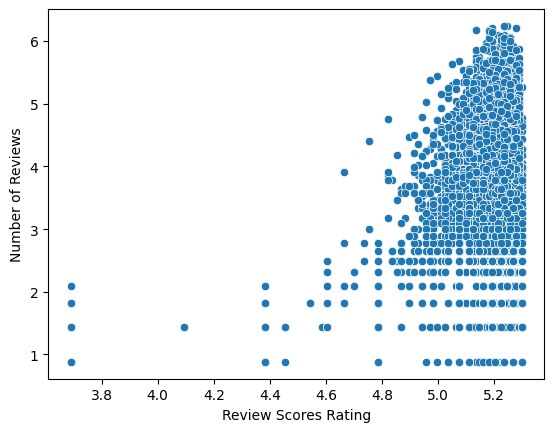

In [59]:
df['Number of Reviews'] = np.arcsinh(df['Number of Reviews'])
df['Review Scores Rating'] = np.arcsinh(df['Review Scores Rating'])
sns.scatterplot(data=df,y='Number of Reviews',x='Review Scores Rating')

<Axes: >

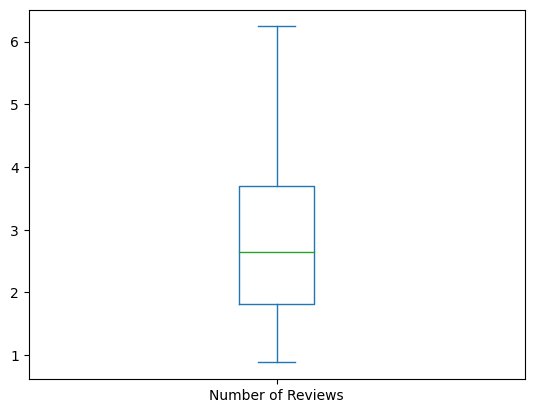

In [60]:
df['Number of Reviews'].plot.box()

In [61]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

3. Implement an 80/20 train-test split. Put the test data aside.

In [72]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Number of Reviews', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    # create the 80/20 train/test split
                                                    test_size=.2,
                                                    random_state=100)
# create the train regression
Z_train = pd.concat([X_train['Number of Reviews'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
# convert train column names to strings
Z_train.columns = Z_train.columns.astype(str)


# create the test regression
Z_test = pd.concat([X_test['Number of Reviews'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)
# convert test column names to strings
Z_test.columns = Z_test.columns.astype(str)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [80]:
from sklearn.metrics import mean_squared_error

# linear model with the Number of Reviews
X_train_model1 = X_train[['Number of Reviews']]
X_test_model1 = X_test[['Number of Reviews']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,
                                                    # create the 80/20 train/test split
                                                    test_size=.2,
                                                    random_state=100)

reg_model1 = linear_model.LinearRegression(fit_intercept=True).fit(X_train_model1, y_train1)
y_hat_train_model1 = reg_model1.predict(X_train_model1)
y_hat_test_model1 = reg_model1.predict(X_test_model1)

print(reg_model1.score(X_train_model1, y_train))
print(np.sqrt(mean_squared_error(y_train, y_hat_train_model1)))
print("Test R^2:", reg_model1.score(X_test_model1, y_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_hat_test_model1)))

1.4175279992922896e-05
156.69380016631177
Test R^2: -0.00133302871629426
Test RMSE: 113.06471310904857


In [75]:
# linear model with just price and neighborhood

X_train_model2 = pd.get_dummies(X_train['Neighbourhood '], dtype='int')
X_test_model2 = pd.get_dummies(X_test['Neighbourhood '], dtype='int')

# Align columns in case some neighborhoods are only in train or test
X_train_model2, X_test_model2 = X_train_model2.align(X_test_model2, join='outer', axis=1, fill_value=0)


reg_model2 = linear_model.LinearRegression(fit_intercept=True).fit(X_train_model2, y_train)
y_hat_train_model2 = reg_model2.predict(X_train_model2)
y_hat_test_model2 = reg_model2.predict(X_test_model2)

print(reg_model2.score(X_train_model2, y_train))
print(np.sqrt(mean_squared_error(y_train, y_hat_train_model2)))
print("Test R^2:", reg_model2.score(X_test_model2, y_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_hat_test_model2)))

0.04180175888347171
153.38488889223416
Test R^2: 0.07734400662192076
Test RMSE: 108.53197795330624


5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [76]:
# using data from quesiton 3

# run the regression
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

# compute R^2 and RMSE for test data
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

# compute R^2 and RMSE for train data
y_hat = reg.predict(Z_train)
print('Rsq: ', reg.score(Z_train,y_train)) # R2
rmse = np.sqrt( np.mean( (y_train - y_hat)**2 ))
print('RMSE: ', rmse) # R2

# get the regression coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.07775872370237735
RMSE:  108.50758363717196
Rsq:  0.0418397298500367
RMSE:  153.38184973502317


,variable,coefficient
0,Number of Reviews,-0.413025
1,Bronx,77.249792
2,Brooklyn,129.109484
3,Manhattan,185.267015
4,Queens,98.560908
5,Staten Island,155.259334


6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

It seems like both the models in question four are underfitted because they had high RMSE values. This would theoretically be improved by adding additional variables into the regression model.
When selecting a model, I learned the importance of intentionally choosing enough variables so that the final product is not either overfit or underfit, but rather well-fit so that its predictive values are as accurate as possible.

7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.